In [1]:
from tensorflow import keras
import numpy as np
import pandas as pd
import random
import os

dataRep = '../data/'
datasetRep = '../data/dataset/'
trainImageRep = '../data/train_images/'
scriptRep = '../'

#Import the scripts
import sys
sys.path.insert(1, os.path.abspath(scriptRep))
import kuzushiji_recognition as kr

unicodeData = pd.read_csv(dataRep+'unicode_translation.csv')
trainData = pd.read_csv(dataRep+'train.csv')
sampleSubData = pd.read_csv(dataRep+'sample_submission.csv')

In [2]:
testFrac = 0.15
valFrac = 0.15

unicodeData = pd.read_csv(dataRep+'unicode_translation.csv')

raw = np.load(datasetRep + 'SegmentationMapsFull.npz')
image = raw['compressed_images'].copy()
maps = raw['maps'].copy()
del raw

index = np.arange(image.shape[0])
np.random.shuffle(index)
image = (image[index].astype(np.float16)/255.0)
maps = (maps[index].astype(np.float16)/255.0)
del index

nTest = int(image.shape[0]*(1.-testFrac))
nVal = int(image.shape[0]*(1.-testFrac-valFrac))
print(image.shape, maps.shape, image.shape[0], image.shape[1:], nVal, nTest)

(3881, 512, 512, 1) (3881, 512, 512, 2) 3881 (512, 512, 1) 2716 3298


In [4]:
kr.trainAndEvaluateModel(kr.createModelUNet((512,512,1), 0.25, 16), '../models/' + 'Unet1.h5', 8, 
                      image, maps, nVal, nTest, lossFunc='categorical_crossentropy', maxEpochs=75)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv1a (Conv2D)                 (None, 512, 512, 16) 160         input[0][0]                      
__________________________________________________________________________________________________
drop1a (SpatialDropout2D)       (None, 512, 512, 16) 0           conv1a[0][0]                     
__________________________________________________________________________________________________
conv1b (Conv2D)                 (None, 512, 512, 16) 2320        drop1a[0][0]                     
____________________________________________________________________________________________

                                                                 conv8a[0][0]                     
__________________________________________________________________________________________________
conv8b (Conv2D)                 (None, 256, 256, 32) 18464       merge8[0][0]                     
__________________________________________________________________________________________________
drop8b (SpatialDropout2D)       (None, 256, 256, 32) 0           conv8b[0][0]                     
__________________________________________________________________________________________________
conv8c (Conv2D)                 (None, 256, 256, 32) 9248        drop8b[0][0]                     
__________________________________________________________________________________________________
drop8c (SpatialDropout2D)       (None, 256, 256, 32) 0           conv8c[0][0]                     
__________________________________________________________________________________________________
conv9a (Co

W0920 16:39:13.079667 16100 callbacks.py:875] `period` argument is deprecated. Please use `save_freq` to specify the frequency in number of samples seen.


Train on 2716 samples, validate on 582 samples
Epoch 1/75


1624/2716 [================>.............] - ETA: 25:55 - loss: 0.5548 - acc: 0.64 - ETA: 14:30 - loss: 0.3490 - acc: 0.47 - ETA: 10:41 - loss: 0.2602 - acc: 0.60 - ETA: 8:47 - loss: 0.2117 - acc: 0.6818 - ETA: 7:38 - loss: 0.1755 - acc: 0.743 - ETA: 6:51 - loss: 0.1499 - acc: 0.786 - ETA: 6:18 - loss: 0.1315 - acc: 0.816 - ETA: 5:53 - loss: 0.1252 - acc: 0.836 - ETA: 5:34 - loss: 0.1129 - acc: 0.854 - ETA: 5:18 - loss: 0.1028 - acc: 0.868 - ETA: 5:05 - loss: 0.0945 - acc: 0.880 - ETA: 4:54 - loss: 0.0881 - acc: 0.889 - ETA: 4:44 - loss: 0.0831 - acc: 0.896 - ETA: 4:36 - loss: 0.0781 - acc: 0.904 - ETA: 4:29 - loss: 0.0738 - acc: 0.910 - ETA: 4:23 - loss: 0.0700 - acc: 0.916 - ETA: 4:17 - loss: 0.0666 - acc: 0.921 - ETA: 4:12 - loss: 0.0638 - acc: 0.925 - ETA: 4:08 - loss: 0.0612 - acc: 0.929 - ETA: 4:03 - loss: 0.0590 - acc: 0.932 - ETA: 4:00 - loss: 0.0573 - acc: 0.935 - ETA: 3:56 - loss: 0.0553 - acc: 0.938 - ETA: 3:53 - loss: 0.0534 - acc: 0.941 - ETA: 3:50 - loss: 0.0515 - acc: 0.

2716/2716 [==============================] - ETA: 1:19 - loss: 0.0182 - acc: 0.993 - ETA: 1:18 - loss: 0.0181 - acc: 0.993 - ETA: 1:17 - loss: 0.0181 - acc: 0.993 - ETA: 1:17 - loss: 0.0181 - acc: 0.993 - ETA: 1:16 - loss: 0.0181 - acc: 0.993 - ETA: 1:16 - loss: 0.0181 - acc: 0.993 - ETA: 1:15 - loss: 0.0180 - acc: 0.993 - ETA: 1:14 - loss: 0.0180 - acc: 0.993 - ETA: 1:14 - loss: 0.0180 - acc: 0.993 - ETA: 1:13 - loss: 0.0180 - acc: 0.993 - ETA: 1:13 - loss: 0.0180 - acc: 0.993 - ETA: 1:12 - loss: 0.0180 - acc: 0.993 - ETA: 1:12 - loss: 0.0180 - acc: 0.993 - ETA: 1:11 - loss: 0.0180 - acc: 0.993 - ETA: 1:10 - loss: 0.0180 - acc: 0.993 - ETA: 1:10 - loss: 0.0179 - acc: 0.993 - ETA: 1:09 - loss: 0.0179 - acc: 0.993 - ETA: 1:09 - loss: 0.0179 - acc: 0.993 - ETA: 1:08 - loss: 0.0179 - acc: 0.993 - ETA: 1:07 - loss: 0.0179 - acc: 0.993 - ETA: 1:07 - loss: 0.0179 - acc: 0.993 - ETA: 1:06 - loss: 0.0178 - acc: 0.993 - ETA: 1:06 - loss: 0.0178 - acc: 0.993 - ETA: 1:05 - loss: 0.0178 - acc: 0.9

1632/2716 [=================>............] - ETA: 3:11 - loss: 0.0135 - acc: 0.999 - ETA: 3:11 - loss: 0.0149 - acc: 0.999 - ETA: 3:09 - loss: 0.0138 - acc: 0.999 - ETA: 3:09 - loss: 0.0136 - acc: 0.999 - ETA: 3:08 - loss: 0.0138 - acc: 0.999 - ETA: 3:08 - loss: 0.0145 - acc: 0.999 - ETA: 3:07 - loss: 0.0143 - acc: 0.999 - ETA: 3:06 - loss: 0.0145 - acc: 0.999 - ETA: 3:06 - loss: 0.0145 - acc: 0.999 - ETA: 3:06 - loss: 0.0149 - acc: 0.999 - ETA: 3:05 - loss: 0.0153 - acc: 0.999 - ETA: 3:04 - loss: 0.0148 - acc: 0.999 - ETA: 3:04 - loss: 0.0148 - acc: 0.999 - ETA: 3:03 - loss: 0.0145 - acc: 0.999 - ETA: 3:03 - loss: 0.0144 - acc: 0.999 - ETA: 3:02 - loss: 0.0147 - acc: 0.999 - ETA: 3:01 - loss: 0.0146 - acc: 0.999 - ETA: 3:01 - loss: 0.0143 - acc: 0.999 - ETA: 3:00 - loss: 0.0143 - acc: 0.999 - ETA: 3:00 - loss: 0.0143 - acc: 0.999 - ETA: 2:59 - loss: 0.0140 - acc: 0.999 - ETA: 2:59 - loss: 0.0142 - acc: 0.999 - ETA: 2:58 - loss: 0.0141 - acc: 0.999 - ETA: 2:58 - loss: 0.0142 - acc: 0.9

2716/2716 [==============================] - ETA: 1:16 - loss: 0.0139 - acc: 0.999 - ETA: 1:15 - loss: 0.0139 - acc: 0.999 - ETA: 1:14 - loss: 0.0139 - acc: 0.999 - ETA: 1:14 - loss: 0.0139 - acc: 0.999 - ETA: 1:13 - loss: 0.0139 - acc: 0.999 - ETA: 1:13 - loss: 0.0139 - acc: 0.999 - ETA: 1:12 - loss: 0.0139 - acc: 0.999 - ETA: 1:12 - loss: 0.0139 - acc: 0.999 - ETA: 1:11 - loss: 0.0139 - acc: 0.999 - ETA: 1:10 - loss: 0.0139 - acc: 0.999 - ETA: 1:10 - loss: 0.0139 - acc: 0.999 - ETA: 1:09 - loss: 0.0139 - acc: 0.999 - ETA: 1:09 - loss: 0.0139 - acc: 0.999 - ETA: 1:08 - loss: 0.0139 - acc: 0.999 - ETA: 1:08 - loss: 0.0139 - acc: 0.999 - ETA: 1:07 - loss: 0.0139 - acc: 0.999 - ETA: 1:06 - loss: 0.0138 - acc: 0.999 - ETA: 1:06 - loss: 0.0138 - acc: 0.999 - ETA: 1:05 - loss: 0.0138 - acc: 0.999 - ETA: 1:05 - loss: 0.0138 - acc: 0.999 - ETA: 1:04 - loss: 0.0138 - acc: 0.999 - ETA: 1:04 - loss: 0.0138 - acc: 0.999 - ETA: 1:03 - loss: 0.0138 - acc: 0.999 - ETA: 1:03 - loss: 0.0138 - acc: 0.9

1632/2716 [=================>............] - ETA: 3:09 - loss: 0.0111 - acc: 0.999 - ETA: 3:09 - loss: 0.0121 - acc: 0.999 - ETA: 3:09 - loss: 0.0123 - acc: 0.999 - ETA: 3:08 - loss: 0.0126 - acc: 0.999 - ETA: 3:08 - loss: 0.0130 - acc: 1.000 - ETA: 3:08 - loss: 0.0136 - acc: 0.999 - ETA: 3:07 - loss: 0.0140 - acc: 0.999 - ETA: 3:06 - loss: 0.0141 - acc: 0.999 - ETA: 3:06 - loss: 0.0140 - acc: 0.999 - ETA: 3:06 - loss: 0.0136 - acc: 0.999 - ETA: 3:06 - loss: 0.0138 - acc: 0.999 - ETA: 3:05 - loss: 0.0136 - acc: 0.999 - ETA: 3:04 - loss: 0.0135 - acc: 0.999 - ETA: 3:04 - loss: 0.0135 - acc: 0.999 - ETA: 3:03 - loss: 0.0137 - acc: 0.999 - ETA: 3:03 - loss: 0.0136 - acc: 0.999 - ETA: 3:02 - loss: 0.0137 - acc: 0.999 - ETA: 3:01 - loss: 0.0139 - acc: 0.999 - ETA: 3:01 - loss: 0.0141 - acc: 0.999 - ETA: 3:00 - loss: 0.0141 - acc: 0.999 - ETA: 3:00 - loss: 0.0141 - acc: 0.999 - ETA: 2:59 - loss: 0.0141 - acc: 0.999 - ETA: 2:59 - loss: 0.0143 - acc: 0.999 - ETA: 2:58 - loss: 0.0142 - acc: 0.9

2716/2716 [==============================] - ETA: 1:16 - loss: 0.0135 - acc: 0.999 - ETA: 1:15 - loss: 0.0135 - acc: 0.999 - ETA: 1:14 - loss: 0.0136 - acc: 0.999 - ETA: 1:14 - loss: 0.0136 - acc: 0.999 - ETA: 1:13 - loss: 0.0136 - acc: 0.999 - ETA: 1:13 - loss: 0.0136 - acc: 0.999 - ETA: 1:12 - loss: 0.0136 - acc: 0.999 - ETA: 1:12 - loss: 0.0136 - acc: 0.999 - ETA: 1:11 - loss: 0.0136 - acc: 0.999 - ETA: 1:11 - loss: 0.0136 - acc: 0.999 - ETA: 1:10 - loss: 0.0136 - acc: 0.999 - ETA: 1:09 - loss: 0.0136 - acc: 0.999 - ETA: 1:09 - loss: 0.0136 - acc: 0.999 - ETA: 1:08 - loss: 0.0136 - acc: 0.999 - ETA: 1:08 - loss: 0.0136 - acc: 0.999 - ETA: 1:07 - loss: 0.0136 - acc: 0.999 - ETA: 1:07 - loss: 0.0136 - acc: 0.999 - ETA: 1:06 - loss: 0.0136 - acc: 0.999 - ETA: 1:05 - loss: 0.0136 - acc: 0.999 - ETA: 1:05 - loss: 0.0136 - acc: 0.999 - ETA: 1:04 - loss: 0.0136 - acc: 0.999 - ETA: 1:04 - loss: 0.0136 - acc: 0.999 - ETA: 1:03 - loss: 0.0136 - acc: 0.999 - ETA: 1:03 - loss: 0.0136 - acc: 0.9

1736/2716 [==================>...........] - ETA: 3:11 - loss: 0.0139 - acc: 1.000 - ETA: 3:12 - loss: 0.0147 - acc: 0.999 - ETA: 3:11 - loss: 0.0133 - acc: 0.999 - ETA: 3:10 - loss: 0.0124 - acc: 0.999 - ETA: 3:09 - loss: 0.0122 - acc: 0.999 - ETA: 3:08 - loss: 0.0125 - acc: 0.999 - ETA: 3:07 - loss: 0.0117 - acc: 0.999 - ETA: 3:07 - loss: 0.0120 - acc: 0.999 - ETA: 3:06 - loss: 0.0124 - acc: 0.999 - ETA: 3:05 - loss: 0.0131 - acc: 0.999 - ETA: 3:05 - loss: 0.0129 - acc: 0.999 - ETA: 3:04 - loss: 0.0128 - acc: 0.999 - ETA: 3:04 - loss: 0.0132 - acc: 0.999 - ETA: 3:03 - loss: 0.0127 - acc: 0.999 - ETA: 3:02 - loss: 0.0128 - acc: 0.999 - ETA: 3:02 - loss: 0.0128 - acc: 0.999 - ETA: 3:01 - loss: 0.0131 - acc: 0.999 - ETA: 3:01 - loss: 0.0130 - acc: 0.999 - ETA: 3:00 - loss: 0.0131 - acc: 0.999 - ETA: 3:00 - loss: 0.0132 - acc: 0.999 - ETA: 2:59 - loss: 0.0131 - acc: 0.999 - ETA: 2:59 - loss: 0.0131 - acc: 0.999 - ETA: 2:58 - loss: 0.0130 - acc: 0.999 - ETA: 2:57 - loss: 0.0131 - acc: 0.9

2716/2716 [==============================] - ETA: 1:05 - loss: 0.0136 - acc: 0.999 - ETA: 1:04 - loss: 0.0136 - acc: 0.999 - ETA: 1:04 - loss: 0.0136 - acc: 0.999 - ETA: 1:03 - loss: 0.0136 - acc: 0.999 - ETA: 1:03 - loss: 0.0135 - acc: 0.999 - ETA: 1:02 - loss: 0.0136 - acc: 0.999 - ETA: 1:02 - loss: 0.0135 - acc: 0.999 - ETA: 1:01 - loss: 0.0135 - acc: 0.999 - ETA: 1:01 - loss: 0.0135 - acc: 0.999 - ETA: 1:00 - loss: 0.0135 - acc: 0.999 - ETA: 1:00 - loss: 0.0135 - acc: 0.999 - ETA: 59s - loss: 0.0135 - acc: 0.999 - ETA: 59s - loss: 0.0135 - acc: 0.99 - ETA: 58s - loss: 0.0135 - acc: 0.99 - ETA: 58s - loss: 0.0135 - acc: 0.99 - ETA: 57s - loss: 0.0135 - acc: 0.99 - ETA: 56s - loss: 0.0135 - acc: 0.99 - ETA: 56s - loss: 0.0135 - acc: 0.99 - ETA: 55s - loss: 0.0135 - acc: 0.99 - ETA: 55s - loss: 0.0135 - acc: 0.99 - ETA: 54s - loss: 0.0135 - acc: 0.99 - ETA: 54s - loss: 0.0135 - acc: 0.99 - ETA: 53s - loss: 0.0135 - acc: 0.99 - ETA: 53s - loss: 0.0135 - acc: 0.99 - ETA: 52s - loss: 0.0

1632/2716 [=================>............] - ETA: 3:10 - loss: 0.0099 - acc: 0.999 - ETA: 3:09 - loss: 0.0122 - acc: 0.999 - ETA: 3:09 - loss: 0.0125 - acc: 0.999 - ETA: 3:09 - loss: 0.0129 - acc: 0.999 - ETA: 3:09 - loss: 0.0124 - acc: 0.999 - ETA: 3:08 - loss: 0.0128 - acc: 0.999 - ETA: 3:08 - loss: 0.0119 - acc: 1.000 - ETA: 3:08 - loss: 0.0125 - acc: 0.999 - ETA: 3:07 - loss: 0.0124 - acc: 0.999 - ETA: 3:07 - loss: 0.0125 - acc: 0.999 - ETA: 3:06 - loss: 0.0119 - acc: 0.999 - ETA: 3:06 - loss: 0.0122 - acc: 0.999 - ETA: 3:05 - loss: 0.0122 - acc: 0.999 - ETA: 3:05 - loss: 0.0122 - acc: 0.999 - ETA: 3:04 - loss: 0.0126 - acc: 0.999 - ETA: 3:04 - loss: 0.0125 - acc: 0.999 - ETA: 3:03 - loss: 0.0130 - acc: 0.999 - ETA: 3:02 - loss: 0.0132 - acc: 0.999 - ETA: 3:02 - loss: 0.0131 - acc: 0.999 - ETA: 3:01 - loss: 0.0132 - acc: 0.999 - ETA: 3:01 - loss: 0.0131 - acc: 0.999 - ETA: 3:00 - loss: 0.0133 - acc: 0.999 - ETA: 2:59 - loss: 0.0134 - acc: 0.999 - ETA: 2:59 - loss: 0.0136 - acc: 0.9

2716/2716 [==============================] - ETA: 1:16 - loss: 0.0137 - acc: 0.999 - ETA: 1:15 - loss: 0.0136 - acc: 0.999 - ETA: 1:15 - loss: 0.0136 - acc: 0.999 - ETA: 1:14 - loss: 0.0136 - acc: 0.999 - ETA: 1:14 - loss: 0.0136 - acc: 0.999 - ETA: 1:13 - loss: 0.0136 - acc: 0.999 - ETA: 1:13 - loss: 0.0136 - acc: 0.999 - ETA: 1:12 - loss: 0.0136 - acc: 0.999 - ETA: 1:11 - loss: 0.0136 - acc: 0.999 - ETA: 1:11 - loss: 0.0136 - acc: 0.999 - ETA: 1:10 - loss: 0.0136 - acc: 0.999 - ETA: 1:10 - loss: 0.0136 - acc: 0.999 - ETA: 1:09 - loss: 0.0136 - acc: 0.999 - ETA: 1:09 - loss: 0.0136 - acc: 0.999 - ETA: 1:08 - loss: 0.0136 - acc: 0.999 - ETA: 1:07 - loss: 0.0136 - acc: 0.999 - ETA: 1:07 - loss: 0.0136 - acc: 0.999 - ETA: 1:06 - loss: 0.0136 - acc: 0.999 - ETA: 1:06 - loss: 0.0136 - acc: 0.999 - ETA: 1:05 - loss: 0.0136 - acc: 0.999 - ETA: 1:05 - loss: 0.0136 - acc: 0.999 - ETA: 1:04 - loss: 0.0136 - acc: 0.999 - ETA: 1:03 - loss: 0.0136 - acc: 0.999 - ETA: 1:03 - loss: 0.0136 - acc: 0.9

1632/2716 [=================>............] - ETA: 3:14 - loss: 0.0152 - acc: 0.999 - ETA: 3:12 - loss: 0.0151 - acc: 0.999 - ETA: 3:11 - loss: 0.0141 - acc: 0.999 - ETA: 3:10 - loss: 0.0130 - acc: 0.999 - ETA: 3:09 - loss: 0.0128 - acc: 0.999 - ETA: 3:08 - loss: 0.0137 - acc: 0.999 - ETA: 3:08 - loss: 0.0142 - acc: 0.999 - ETA: 3:07 - loss: 0.0148 - acc: 0.999 - ETA: 3:07 - loss: 0.0145 - acc: 0.999 - ETA: 3:06 - loss: 0.0143 - acc: 0.999 - ETA: 3:06 - loss: 0.0142 - acc: 0.999 - ETA: 3:06 - loss: 0.0141 - acc: 0.999 - ETA: 3:05 - loss: 0.0142 - acc: 0.999 - ETA: 3:04 - loss: 0.0142 - acc: 0.999 - ETA: 3:04 - loss: 0.0142 - acc: 0.999 - ETA: 3:03 - loss: 0.0142 - acc: 0.999 - ETA: 3:03 - loss: 0.0142 - acc: 0.999 - ETA: 3:02 - loss: 0.0142 - acc: 0.999 - ETA: 3:01 - loss: 0.0143 - acc: 0.999 - ETA: 3:01 - loss: 0.0143 - acc: 0.999 - ETA: 3:00 - loss: 0.0144 - acc: 0.999 - ETA: 2:59 - loss: 0.0144 - acc: 0.999 - ETA: 2:59 - loss: 0.0144 - acc: 0.999 - ETA: 2:58 - loss: 0.0146 - acc: 0.9

2716/2716 [==============================] - ETA: 1:16 - loss: 0.0133 - acc: 0.999 - ETA: 1:15 - loss: 0.0133 - acc: 0.999 - ETA: 1:14 - loss: 0.0133 - acc: 0.999 - ETA: 1:14 - loss: 0.0133 - acc: 0.999 - ETA: 1:13 - loss: 0.0133 - acc: 0.999 - ETA: 1:13 - loss: 0.0133 - acc: 0.999 - ETA: 1:12 - loss: 0.0133 - acc: 0.999 - ETA: 1:12 - loss: 0.0133 - acc: 0.999 - ETA: 1:11 - loss: 0.0133 - acc: 0.999 - ETA: 1:11 - loss: 0.0133 - acc: 0.999 - ETA: 1:10 - loss: 0.0133 - acc: 0.999 - ETA: 1:09 - loss: 0.0133 - acc: 0.999 - ETA: 1:09 - loss: 0.0133 - acc: 0.999 - ETA: 1:08 - loss: 0.0133 - acc: 0.999 - ETA: 1:08 - loss: 0.0133 - acc: 0.999 - ETA: 1:07 - loss: 0.0133 - acc: 0.999 - ETA: 1:07 - loss: 0.0133 - acc: 0.999 - ETA: 1:06 - loss: 0.0133 - acc: 0.999 - ETA: 1:05 - loss: 0.0133 - acc: 0.999 - ETA: 1:05 - loss: 0.0133 - acc: 0.999 - ETA: 1:04 - loss: 0.0133 - acc: 0.999 - ETA: 1:04 - loss: 0.0133 - acc: 0.999 - ETA: 1:03 - loss: 0.0133 - acc: 0.999 - ETA: 1:03 - loss: 0.0133 - acc: 0.9

W0920 16:59:53.068848 16100 deprecation.py:506] From C:\Users\bapti\Miniconda3\envs\env\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0920 16:59:53.070809 16100 deprecation.py:506] From C:\Users\bapti\Miniconda3\envs\env\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


582/582 [==============================] - ETA: 1:11 - loss: 0.0136 - acc: 0.999 - ETA: 39s - loss: 0.0123 - acc: 0.999 - ETA: 28s - loss: 0.0134 - acc: 0.99 - ETA: 22s - loss: 0.0134 - acc: 0.99 - ETA: 18s - loss: 0.0134 - acc: 0.99 - ETA: 15s - loss: 0.0135 - acc: 0.99 - ETA: 13s - loss: 0.0133 - acc: 0.99 - ETA: 11s - loss: 0.0130 - acc: 0.99 - ETA: 10s - loss: 0.0132 - acc: 0.99 - ETA: 8s - loss: 0.0133 - acc: 0.9999 - ETA: 7s - loss: 0.0131 - acc: 0.999 - ETA: 6s - loss: 0.0133 - acc: 0.999 - ETA: 5s - loss: 0.0131 - acc: 0.999 - ETA: 4s - loss: 0.0133 - acc: 0.999 - ETA: 3s - loss: 0.0132 - acc: 0.999 - ETA: 2s - loss: 0.0132 - acc: 0.999 - ETA: 1s - loss: 0.0132 - acc: 0.999 - ETA: 0s - loss: 0.0132 - acc: 0.999 - 16s 28ms/sample - loss: 0.0132 - acc: 0.9999


0.013171783085157167

In [9]:
model = keras.models.load_model('../models/' + 'Unet1.h5')
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [13]:
result = model.predict(np.array([image[0]]))
maps = maps[0]

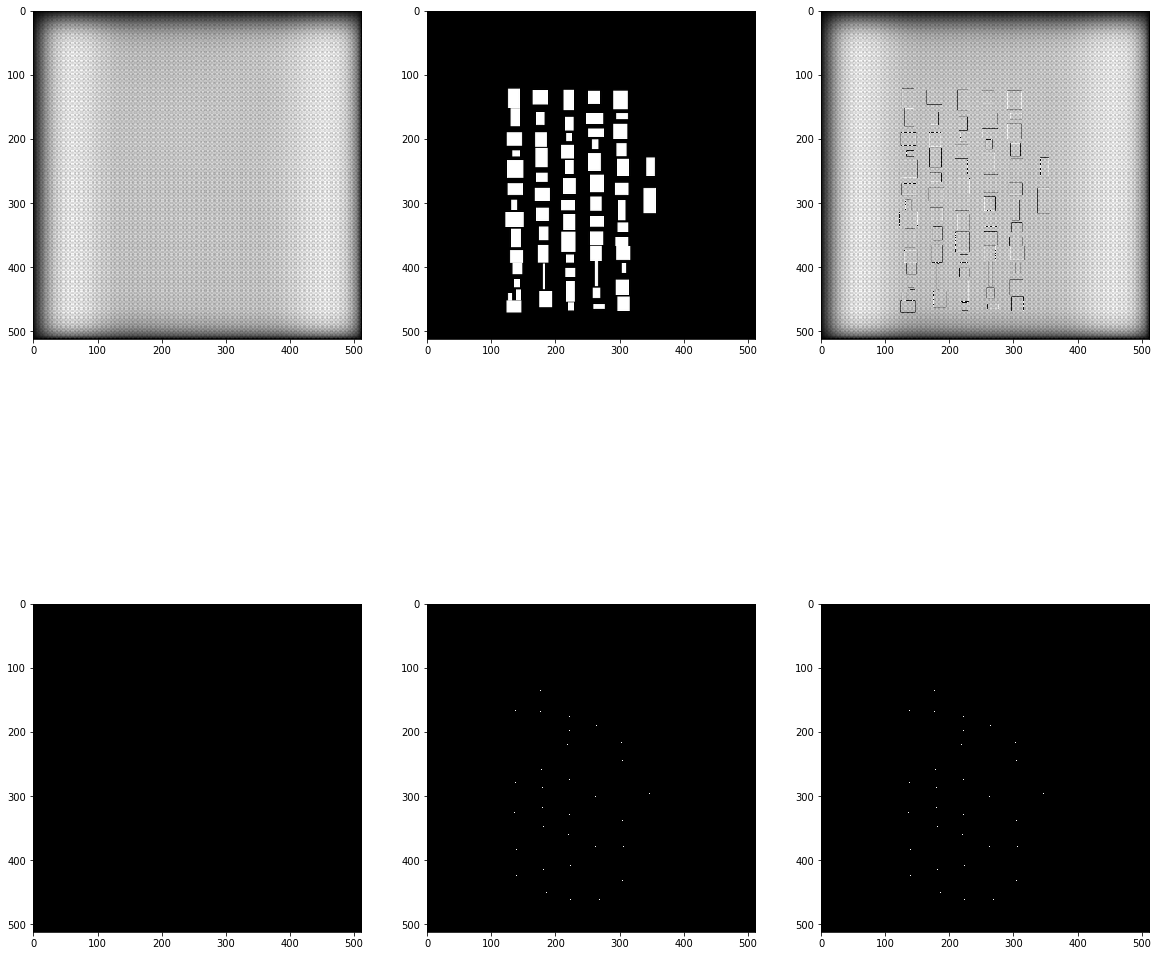

In [14]:
resultSq = np.squeeze(result)
resultInt = (255*resultSq/np.amax(resultSq)).astype(np.uint8)
diff = abs(resultInt - maps)

plt.figure(figsize=(20,20))
plt.subplot(2,3,1)
plt.imshow(resultInt[:,:,0], cmap='gist_gray')
plt.subplot(2,3,2)
plt.imshow(maps[:,:,0], cmap='gist_gray')
plt.subplot(2,3,3)
plt.imshow(diff[:,:,0], cmap='gist_gray')
plt.subplot(2,3,4)
plt.imshow(resultInt[:,:,1], cmap='gist_gray')
plt.subplot(2,3,5)
plt.imshow(maps[:,:,1], cmap='gist_gray')
plt.subplot(2,3,6)
plt.imshow(diff[:,:,1], cmap='gist_gray')


In [12]:
from PIL import Image
import matplotlib.pyplot as plt

raw = np.load(datasetRep + 'SegmentationMapsFull.npz')
image = raw['compressed_images'].copy()
maps = raw['maps'].copy()
del raw

In [5]:
import platform
platform.architecture()

('64bit', 'WindowsPE')

In [6]:
is_64bits = sys.maxsize > 2**32
is_64bits

True

In [7]:
import numpy as np
a = (np.random.random((4000,512,512,1))*255).astype(np.uint8).astype(np.float16)

KeyboardInterrupt: 

In [ ]:
import sys
print(sys.maxsize / 1e6)